In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

In [2]:
df = gl.load_notebook_data(    parameterization = '1'
)
df

,RGIId,Edasi Mean Thickness,Edasi Median Thickness,Edasi Thickness Std Dev,Edasi Shapiro-Wilk statistic,Edasi Shapiro-Wilk p_value,Edasi IQR,Edasi Lower Bound,Edasi Upper Bound,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Edasi Volume (km3),Edasi Volume Std Dev (km3),Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3)
0,RGI60-01.00001,84.768480,84.066465,14.806874,0.991257,1.137510e-14,18.511153,14.089784,13.716581,3860.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,0.030517,0.005330,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196
1,RGI60-01.00002,97.544410,97.323850,14.737346,0.989276,1.598755e-16,17.508110,13.870683,12.972633,3860.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,0.054430,0.008223,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413
2,RGI60-01.00003,96.504059,96.209630,13.773548,0.986307,6.739806e-19,16.281884,12.744192,12.178275,3860.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,0.162609,0.023208,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688
3,RGI60-01.00004,99.089972,98.412145,13.319257,0.982891,3.261693e-21,15.891104,12.452494,12.040758,3860.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,0.364750,0.049028,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319
4,RGI60-01.00005,97.804597,97.412985,13.734984,0.986117,4.890680e-19,16.376054,12.890809,12.336807,3860.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,0.251651,0.035340,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215514,RGI60-19.02748,86.782728,86.928568,7.380339,0.979701,4.342400e-23,8.892417,6.508756,6.521860,3860.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,0.003645,0.000310,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529
215515,RGI60-19.02749,96.221434,96.061675,7.430020,0.988484,3.383010e-17,9.713282,7.124506,7.086588,3860.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,0.054558,0.004213,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642
215516,RGI60-19.02750,95.312641,95.119957,6.752772,0.975774,4.057586e-25,8.001103,6.232721,6.057009,3860.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,0.392497,0.027808,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293
215517,RGI60-19.02751,110.835393,110.612125,9.093575,0.986901,1.872078e-18,12.701472,9.240355,8.889663,3860.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,0.001219,0.000100,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112


In [4]:
glac = gl.load_training_data(RGI_input = 'y', 
                             root_dir = '/data/fast1/glacierml/data/')

In [5]:
glac = glac[['RGIId', 'Thickness']]
df = pd.merge(df, glac, on = 'RGIId', how = 'inner')
df

,RGIId,Edasi Mean Thickness,Edasi Median Thickness,Edasi Thickness Std Dev,Edasi Shapiro-Wilk statistic,Edasi Shapiro-Wilk p_value,Edasi IQR,Edasi Lower Bound,Edasi Upper Bound,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Edasi Volume (km3),Edasi Volume Std Dev (km3),Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,315.113784,315.618605,128.103743,0.993338,2.154331e-12,170.438505,128.621185,120.356549,3860.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,73.920337,30.050960,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,81.496398,80.487580,8.256079,0.932740,1.273972e-38,8.767076,7.000128,6.883919,3860.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,1.431647,0.145035,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,78.847047,77.774145,7.952259,0.933781,2.160029e-38,9.222823,7.217440,6.731112,3860.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,0.751255,0.075769,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,89.270949,89.165915,15.971226,0.994974,2.946794e-10,19.599960,15.562350,14.413362,3860.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.013658,0.002444,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,89.270949,89.165915,15.971226,0.994974,2.946794e-10,19.599960,15.562350,14.413362,3860.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.013658,0.002444,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,118.391108,117.770208,9.740577,0.976158,6.238938e-25,13.960026,10.142587,9.792432,3860.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,0.025217,0.002075,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,108.237362,107.722255,6.363581,0.912515,1.366266e-42,7.138199,5.617728,5.038487,3860.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,0.783639,0.046072,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,98.183636,98.129330,6.768316,0.980431,1.114014e-22,8.524160,6.263347,6.197332,3860.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,0.113893,0.007851,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,96.252623,96.082288,4.774647,0.947927,5.962408e-35,5.568470,4.296461,4.022520,3860.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,0.528716,0.026227,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


# Density plot of E&L vs GlaThiDa mean thickness

In [6]:
# df = df.drop(df[df['Edasi Mean Thickness'] >= 500].index)

In [7]:
from scipy.stats import gaussian_kde

data_1 = df['Edasi Mean Thickness']
data_2 = df['Farinotti Mean Thickness']
data_3 = df['Thickness']


# data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
# data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

print('Sorting data...')
x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

x_3 = np.sort(data_3)
y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

print('Calculating point density...')
# Calculate the point density
xy = np.vstack([np.log10(data_1),np.log10(data_3)])

z_1 = gaussian_kde(xy)(xy)

yz = np.vstack([np.log10(data_2),np.log10(data_3)])

z_2 = gaussian_kde(yz)(yz)

Sorting data...
Calculating point density...


Text(0.5, 0.95, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nIce Thickness Estimates VS. GlaThiDa Measurements')

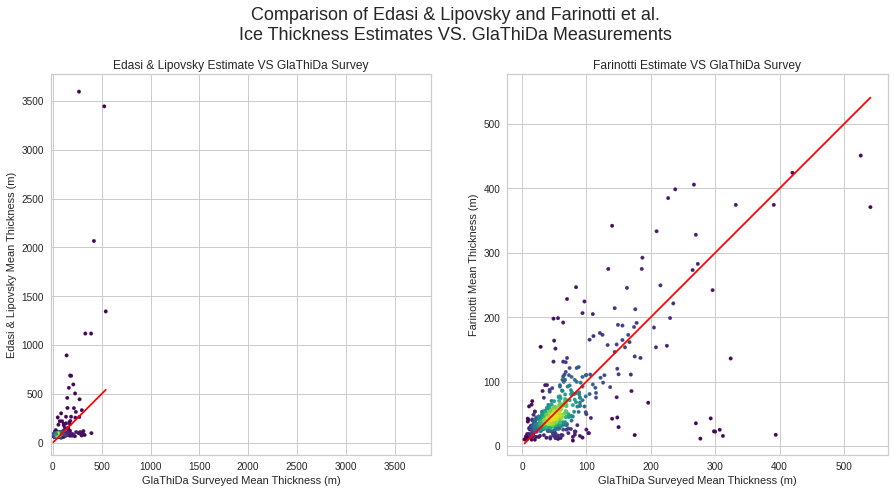

In [8]:
fig = plt.subplots(figsize = (15,8))
plt.subplot(1,2,1)
plt.scatter(
    data_3,
    data_1,
    marker = '.',
    c = (z_1),
    cmap = 'viridis'
)
plt.axis('square')

plt.plot(
    (df['Thickness'].min(), df['Thickness'].max()),
    (df['Thickness'].min(), df['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Edasi & Lipovsky Estimate VS GlaThiDa Survey')
plt.ylabel('Edasi & Lipovsky Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')

plt.subplot(1,2,2)
plt.scatter(
    data_3,
    data_2,
    marker = '.',
    c = (z_2),
    cmap = 'viridis'
)
plt.axis('square')
plt.plot(
    (df['Thickness'].min(), df['Thickness'].max()),
    (df['Thickness'].min(), df['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Farinotti Estimate VS GlaThiDa Survey')
plt.ylabel('Farinotti Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nIce Thickness Estimates VS. GlaThiDa Measurements', y = .95, fontsize = 18
)

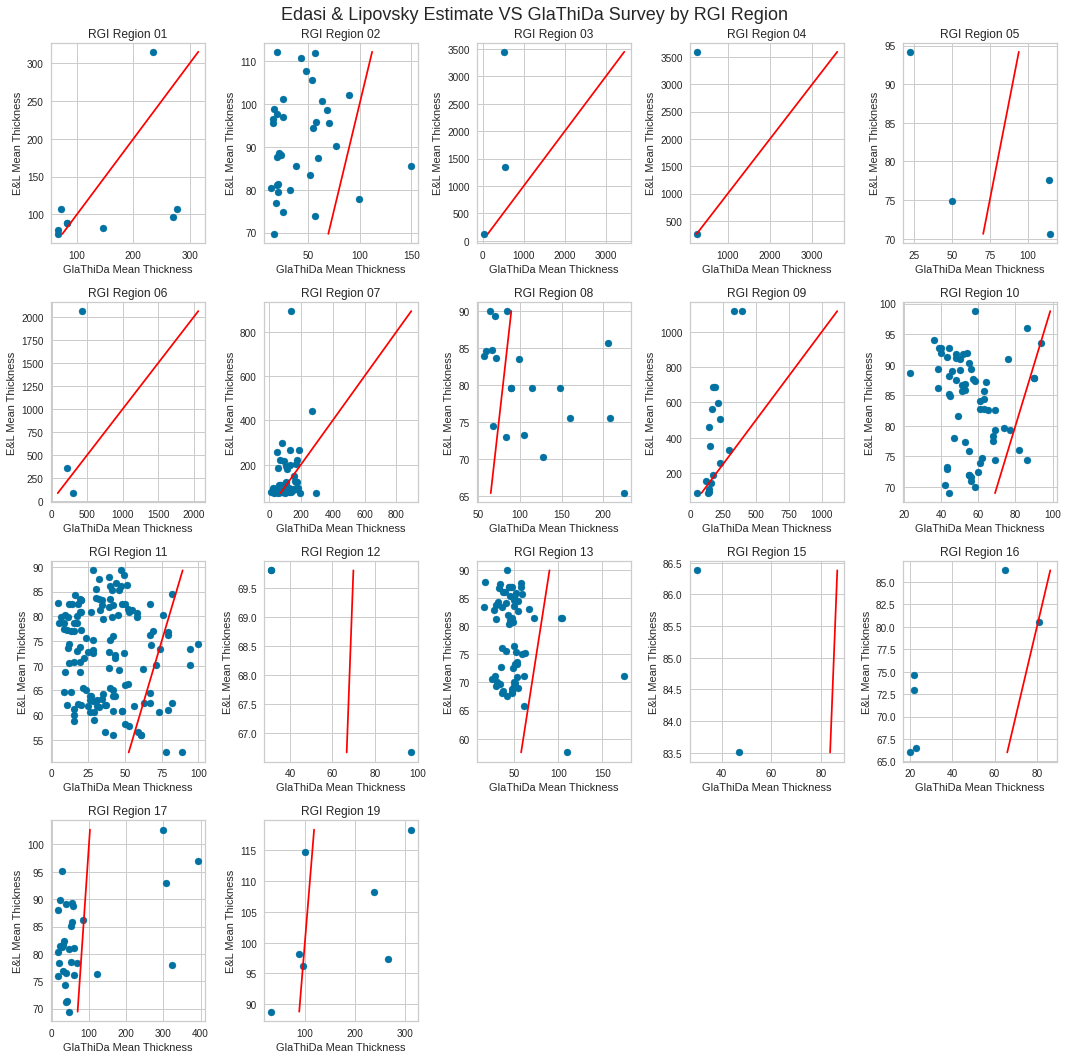

In [9]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(df['region'].unique()):
    dft = df[df['region'] == reg]
    data_1 = dft['Edasi Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_xlabel('GlaThiDa Mean Thickness')
    ax.set_ylabel('E&L Mean Thickness')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_2,
        data_1,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('Edasi & Lipovsky Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()

# Do these terrible underestimated glaciers have anything in common?

In [10]:
df['Farinotti Residual'] = abs(df['Farinotti Mean Thickness'] - df['Thickness'])
df = df.sort_values('Farinotti Residual', ascending = False)

In [11]:
feature_list = [
    'Farinotti Mean Thickness', 'Thickness', 'Area', 'Slope', 
    'Lmax', 'Zmed', 'Zmax'
]

In [12]:
def rsf(rank = 'top', stat = 'mean'):
    

    residuals = []
    for feature in feature_list:
        if rank == 'top':
            if stat == 'mean':
                statistic = str(np.round(df[feature].head(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(df[feature].head(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(df[feature].head(111).std(),2))
        if rank == 'bot':
            if stat == 'mean':
                statistic = str(np.round(df[feature].tail(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(df[feature].tail(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(df[feature].tail(111).std(),2))
        residuals.append(statistic)
    return residuals

In [13]:
# feature_list.insert(0, 'Weighted Mean Thickness_x')
residual_stats_f = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_f

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,115.86,46.9,87.23,39.57,107.21,42.26
1,GlaThiDa Mean Thickness,128.93,46.18,94.0,40.0,99.88,42.0
2,Area (km^2),117.29,17.45,5.31,1.74,387.91,148.02
3,Slope(deg),15.32,18.16,13.6,17.7,8.61,5.75
4,Maximum Length (m),8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,Median Elevation (m),1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,Maximum Elevation (m),1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


In [14]:
df['E&L Residual'] = abs(df['Edasi Mean Thickness'] - df['Thickness'])
df = df.sort_values('E&L Residual', ascending = False)
feature_list.remove('Farinotti Mean Thickness')
feature_list.insert(0, 'Edasi Mean Thickness')

In [15]:
residual_stats_e = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_e

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,252.81,82.04,88.08,77.52,529.71,25.14
1,GlaThiDa Mean Thickness,110.5,75.74,28.0,69.0,124.01,27.65
2,Area (km^2),141.73,10.0,2.38,3.7,417.8,24.24
3,Slope(deg),16.96,15.96,16.9,15.2,8.83,6.67
4,Maximum Length (m),9466.58,4291.16,2746.0,3508.0,14774.99,4224.45
5,Median Elevation (m),1815.35,2215.68,2098.0,2971.0,1287.21,1439.16
6,Maximum Elevation (m),2185.75,2569.0,2651.0,3243.0,1286.48,1426.71


In [16]:
select = [x for x in residual_stats_f.columns if x != 'Feature']
df_f = residual_stats_f[select]
df_f

select = [x for x in residual_stats_e.columns if x != 'Feature']
df_e = residual_stats_e[select]
df_e

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,252.81,82.04,88.08,77.52,529.71,25.14
1,110.5,75.74,28.0,69.0,124.01,27.65
2,141.73,10.0,2.38,3.7,417.8,24.24
3,16.96,15.96,16.9,15.2,8.83,6.67
4,9466.58,4291.16,2746.0,3508.0,14774.99,4224.45
5,1815.35,2215.68,2098.0,2971.0,1287.21,1439.16
6,2185.75,2569.0,2651.0,3243.0,1286.48,1426.71


In [17]:
df_f

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,115.86,46.9,87.23,39.57,107.21,42.26
1,128.93,46.18,94.0,40.0,99.88,42.0
2,117.29,17.45,5.31,1.74,387.91,148.02
3,15.32,18.16,13.6,17.7,8.61,5.75
4,8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


# Build regional statistics difference table

In [19]:
def find_residual_stat_diff(stat = 'length', region = '01', study = 'edasi'):
    
    dft = df[df['region'] == region]
    
    if stat == 'mean':
        
        mean_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).mean()
        mean_g = np.array(dft['Thickness'] - dft['Thickness']).mean()
        mean_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).mean()
        statistic_e = mean_e - mean_g
        statistic_f = mean_f - mean_g
    
    if stat == 'median':
        e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness'])
        median_e = np.median(e)
        g = np.array(dft['Thickness'] - dft['Thickness'])
        median_g = np.median(g)
        f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness'])
        median_f = np.median(f)
        statistic_e = median_e - median_g
        statistic_f = median_f - median_g
    
    if stat == 'std':
        std_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).std()
        std_g = np.array(dft['Thickness'] - dft['Thickness']).std()
        std_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).std()
        statistic_e = std_e - std_g
        statistic_f = std_f - std_g
    if stat == 'length':
        statistic_e = len(dft)
        statistic_f = len(dft)
#     print(statistic)
#     print(residuals)
    if study == 'edasi':
        residual = statistic_e
    if study == 'farinotti':
        residual = statistic_f
#     print(residuals)
    return residual

In [20]:
region_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '15', '16', '17', '19']

In [21]:
mean_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'edasi')
    mean_diff_e.append(res)

mean_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'farinotti')
    mean_diff_f.append(res)

median_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'edasi')
    median_diff_e.append(res)

median_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'farinotti')
    median_diff_f.append(res)

std_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'edasi')
    std_diff_e.append(res)

std_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'farinotti')
    std_diff_f.append(res)
    
trainable_glaciers = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'length', region = reg, study = 'farinotti')
    trainable_glaciers.append(res)
print(*trainable_glaciers)

9 35 3 2 4 3 81 20 18 66 141 3 68 2 6 32 7


In [22]:
stats = pd.DataFrame({
    'RGI Region':[
        *region_list
    ],
    'E&L Difference of Mean':[
        *mean_diff_e
    ],
    'Farinotti Difference of Mean':[
        *mean_diff_f
    ],
    'E&L Difference of Median':[
        *median_diff_e
    ],    
    'Farinotti Difference of Median':[
        *median_diff_f
    ],
    'E&L Difference of STD':[
        *std_diff_e
    ],
    'Farinotti Difference of STD':[
        *std_diff_f
    ],
    'Trainable Glaciers':[
        *trainable_glaciers
    ]
})
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
0,01,28.740605,77.981038,-7.270949,59.614202,84.195596,97.924514,9
1,02,-47.851395,8.326012,-54.843088,0.798704,30.438630,25.048409,35
2,03,-1273.772898,40.043923,-803.049751,75.065980,1198.139031,123.006823,3
3,04,-1660.423859,-98.419435,-1660.423859,-98.419435,1668.181010,40.415865,2
4,05,-4.087950,13.129670,5.737869,10.986469,47.588626,15.270133,4
5,06,-522.189463,79.675773,-138.084650,-4.212620,807.444948,140.525549,3
6,07,-31.752542,-19.137063,-19.304725,-16.584312,102.827819,68.170291,81
7,08,29.966630,11.899313,10.630685,15.459857,54.802588,26.900465,20
8,09,-227.465679,-39.455114,-121.325313,-37.697105,264.471259,58.808158,18
9,10,-27.031207,19.841131,-28.895606,18.040144,16.925563,16.786918,66


In [23]:
stats = stats.sort_values('E&L Difference of Mean', ascending = True, key = abs)
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
15,17,-3.427203,30.418439,-34.034617,-4.876753,94.944453,99.025596,32
4,05,-4.087950,13.129670,5.737869,10.986469,47.588626,15.270133,4
11,12,-15.762361,6.926283,-38.811521,-7.420776,32.596434,20.289805,3
9,10,-27.031207,19.841131,-28.895606,18.040144,16.925563,16.786918,66
0,01,28.740605,77.981038,-7.270949,59.614202,84.195596,97.924514,9
12,13,-29.112199,12.522796,-34.137960,7.615041,25.281985,25.301089,68
7,08,29.966630,11.899313,10.630685,15.459857,54.802588,26.900465,20
6,07,-31.752542,-19.137063,-19.304725,-16.584312,102.827819,68.170291,81
10,11,-34.578813,-4.490770,-37.877632,-5.107185,24.994891,19.008386,141
14,16,-35.655597,5.009044,-44.742879,-0.266172,19.148313,18.796392,6


In [24]:
# stats = stats.drop(stats[stats['E&L Difference of Mean'] <= -200].index)

17


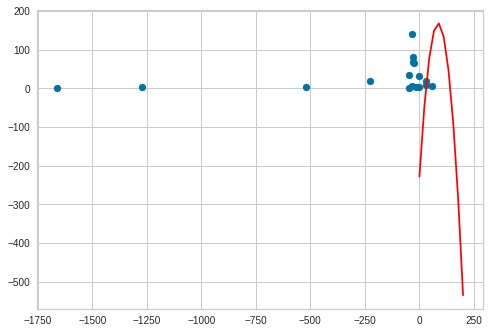

In [25]:
plt.scatter(
    (stats['E&L Difference of Mean']),
    stats['Trainable Glaciers'],
#     marker = '.'
)
x = np.arange(-1, 250, 250/16)
print(len(x))
y = stats['E&L Difference of Mean']

# print(len(y))
model = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(0, 200, 10)

plt.plot(polyline, model(polyline), color = 'red')

In [26]:
from scipy.stats import pearsonr

In [27]:
print(len(stats))

17


In [28]:
x = (stats['Farinotti Difference of Mean'])
y = (stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.10202870540302897, 0.6967939817834632)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 4.739546114035258
	b = popt[1] = 0.3819626900746628


Text(0.5, 0, 'E&L Difference of Mean')

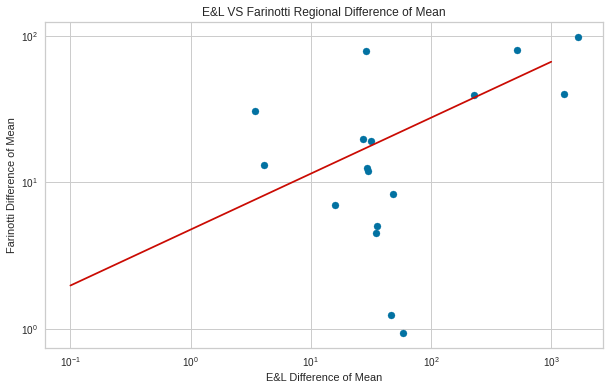

In [29]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Farinotti Difference of Mean'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')
def myExpFunc(x, a, b):
    return a * np.power(x, b)

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Mean')
plt.xlabel('E&L Difference of Mean')

In [30]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
pearsonr(x,y)

(0.8335949900889539, 3.225440624148137e-05)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 1.4222279627704837
	b = popt[1] = 0.5743330494825295


Text(0.5, 0, 'E&L Difference of Median')

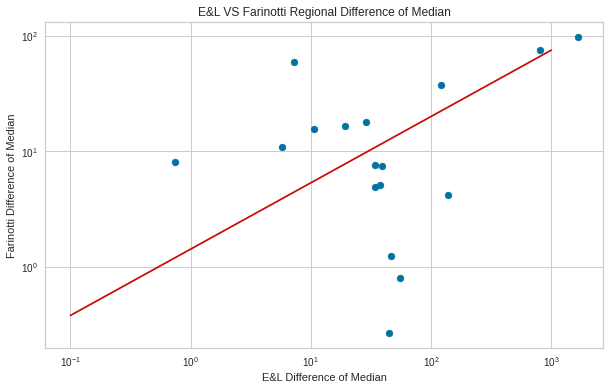

In [31]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Median')
plt.xlabel('E&L Difference of Median')

In [32]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
pearsonr(x,y)

(0.37025704656851466, 0.14349006091319697)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 17.670022368779403
	b = popt[1] = 0.24885586250614108


Text(0.5, 0, 'E&L Difference of STD')

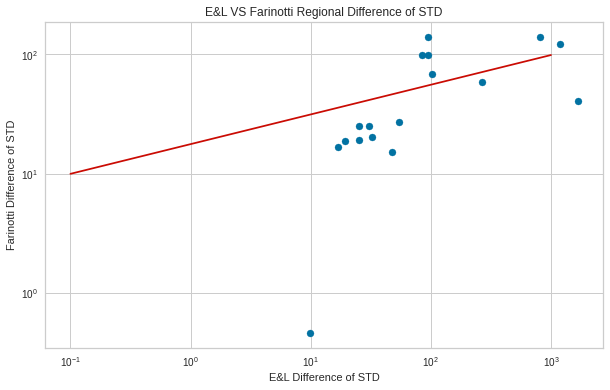

In [33]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of STD')
plt.xlabel('E&L Difference of STD')

In [34]:
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.30921433452950686, 0.22716707951572743)

In [35]:
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.3143476522988228, 0.21914154114427867)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 47.88858614727159
	b = popt[1] = -0.12516344474627356
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 35.54927767600512
	b = popt[1] = -0.0723146103330844


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Mean')

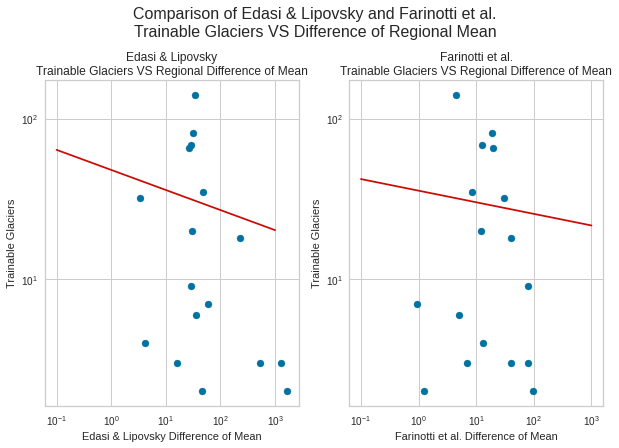

In [36]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Mean')
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Mean')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Mean', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [37]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.2569214608026789, 0.3195082821155338)

In [38]:
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.27307922863871836, 0.28891834846781933)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 34.0282665351723
	b = popt[1] = -0.04014268663896622
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.112060278343037
	b = popt[1] = -0.026037786669719835


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Median')

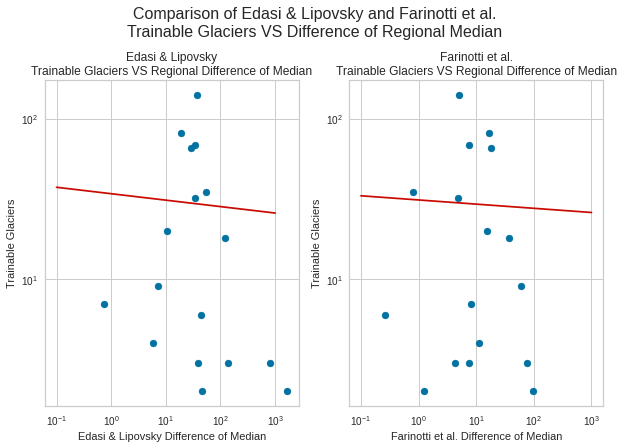

In [39]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Median')
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Median')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Median', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [40]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)


(-0.3296444390884911, 0.19631841083677332)

In [41]:
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.2694998156738846, 0.29553686732771456)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 89.58047119308033
	b = popt[1] = -0.26639442222856724
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.62291908623884
	b = popt[1] = -0.020814548753598044


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional STD')

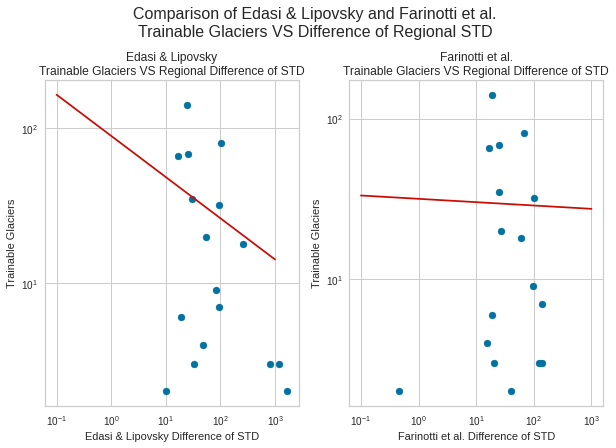

In [42]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of STD')
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of STD')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional STD', y = 1.05, fontsize = 16
)
# plt.tight_layout()